In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [48]:
price_df=pd.read_csv('data/townAreaPrice.csv')
price_df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


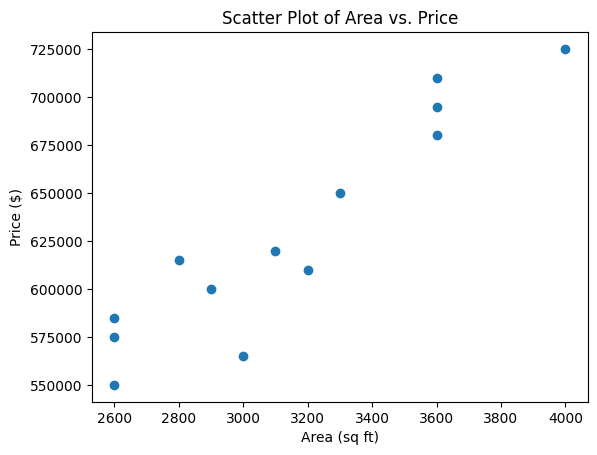

In [82]:
x = price_df['area']
y = price_df['price']
plt.scatter(x,y)
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.title('Scatter Plot of Area vs. Price')

plt.show()

In [49]:
le = LabelEncoder()
price_df['town_encoded'] = le.fit_transform(price_df['town'])
price_df


,town,area,price,town_encoded
0,monroe township,2600,550000,0
1,monroe township,3000,565000,0
2,monroe township,3200,610000,0
3,monroe township,3600,680000,0
4,monroe township,4000,725000,0
5,west windsor,2600,585000,2
6,west windsor,2800,615000,2
7,west windsor,3300,650000,2
8,west windsor,3600,710000,2
9,robinsville,2600,575000,1


In [50]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
town_encoded = ohe.fit_transform(price_df[['town_encoded']])
town_encoded

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [51]:
# Convert the OneHotEncoded data to a DataFrame
town_encoded_df = pd.DataFrame(town_encoded, columns=ohe.get_feature_names_out(['town_encoded']))
town_encoded_df

,town_encoded_1,town_encoded_2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,1.0,0.0


In [52]:
price_df = pd.concat([price_df, town_encoded_df], axis=1)
price_df

,town,area,price,town_encoded,town_encoded_1,town_encoded_2
0,monroe township,2600,550000,0,0.0,0.0
1,monroe township,3000,565000,0,0.0,0.0
2,monroe township,3200,610000,0,0.0,0.0
3,monroe township,3600,680000,0,0.0,0.0
4,monroe township,4000,725000,0,0.0,0.0
5,west windsor,2600,585000,2,0.0,1.0
6,west windsor,2800,615000,2,0.0,1.0
7,west windsor,3300,650000,2,0.0,1.0
8,west windsor,3600,710000,2,0.0,1.0
9,robinsville,2600,575000,1,1.0,0.0


In [54]:
x= price_df[['area', 'town_encoded_1', 'town_encoded_2']]
y= price_df['price']

In [78]:
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [94]:
predict_df = pd.DataFrame({
	'area':[3400, 2800, 5000, 4000, 4400, 3600],
	'town_encoded_1':[0, 0, 0, 1, 1, 0],
	'town_encoded_2':[0, 1, 0, 0, 0, 1]
})

y_pred= model.predict(predict_df)
y_pred


array([641227.69296925, 605103.20361213, 844263.59922597, 743052.56933992,
       793811.5459041 , 706621.15674048])

In [77]:
model.score(x,y)

0.9496193619616312

In [91]:
y.shape

(13,)